|Challenge Set |**3 **                                 |
|-------------:|:--------------------------------------|
|Topic:        |Linear Regression and Train/Test Split |
|Date:         |07/24/2016                             | 
|Name:         |Bryant Biggs                           |
|Worked with:  |N/A                                    |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
---

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import numpy as np
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 2.5})

In [2]:
data_file = 'data.csv'

# read in data and select columns of interest
df = pd.read_csv(data_file, encoding='utf-8')
df['Released'] = pd.to_datetime(df['Released'])
df['Prod_Budget'] = pd.to_numeric(df['Prod_Budget'])
df['Dom_Gross'] = pd.to_numeric(df['Dom_Gross'])
df['World_Gross'] = pd.to_numeric(df['World_Gross'])

assert df['Released'].dtype == 'datetime64[ns]'
assert df['Prod_Budget'].dtype == 'int64'
assert df['Dom_Gross'].dtype == 'int64'
assert df['World_Gross'].dtype == 'int64'

df = df[['Title', 'Prod_Budget', 'Dom_Gross', 'World_Gross', 'Released', 'Rated', 'Runtime', 'Genre', 'Director']]
df.head()

,Title,Prod_Budget,Dom_Gross,World_Gross,Released,Rated,Runtime,Genre,Director
0,Avatar,425000000,760507625,2783918982,2009-12-18,PG-13,162,"Action, Adventure, Fantasy",James Cameron
1,Spectre,300000000,200074175,879620923,2015-11-06,PG-13,148,"Action, Adventure, Thriller",Sam Mendes
2,The Dark Knight Rises,275000000,448139099,1084439099,2012-07-20,PG-13,164,"Action, Adventure, Drama",Christopher Nolan
3,John Carter,275000000,73058679,282778100,2012-03-09,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton
4,Tangled,260000000,200821936,586581936,2010-11-24,PG,100,"Animation, Adventure, Comedy","Nathan Greno, Byron Howard"


# <a id='1'></a>Challenge 1:
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [3]:
from sklearn.linear_model import LinearRegression

# add column of all 1's
df['Static'] = 1

X = df[['Static']]
y = df['Dom_Gross']

# linear regression model
lrm = LinearRegression()
mdl = lrm.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [13]:
# model results and comparison with domestic gross mean
pred = 1
print('Intercept: {0}'.format(lrm.intercept_))
print('Coeficient: {0}'.format(lrm.coef_))
print('Prediction value for {0}: {1}'.format(pred, lrm.predict(pred)))
print('Mean: {0}'.format(df['Dom_Gross'].mean()))

Intercept: 66369105.43357488
Coeficient: [ 0.]
Prediction value for 1: [ 66369105.43357488]
Mean: 66369105.43357488


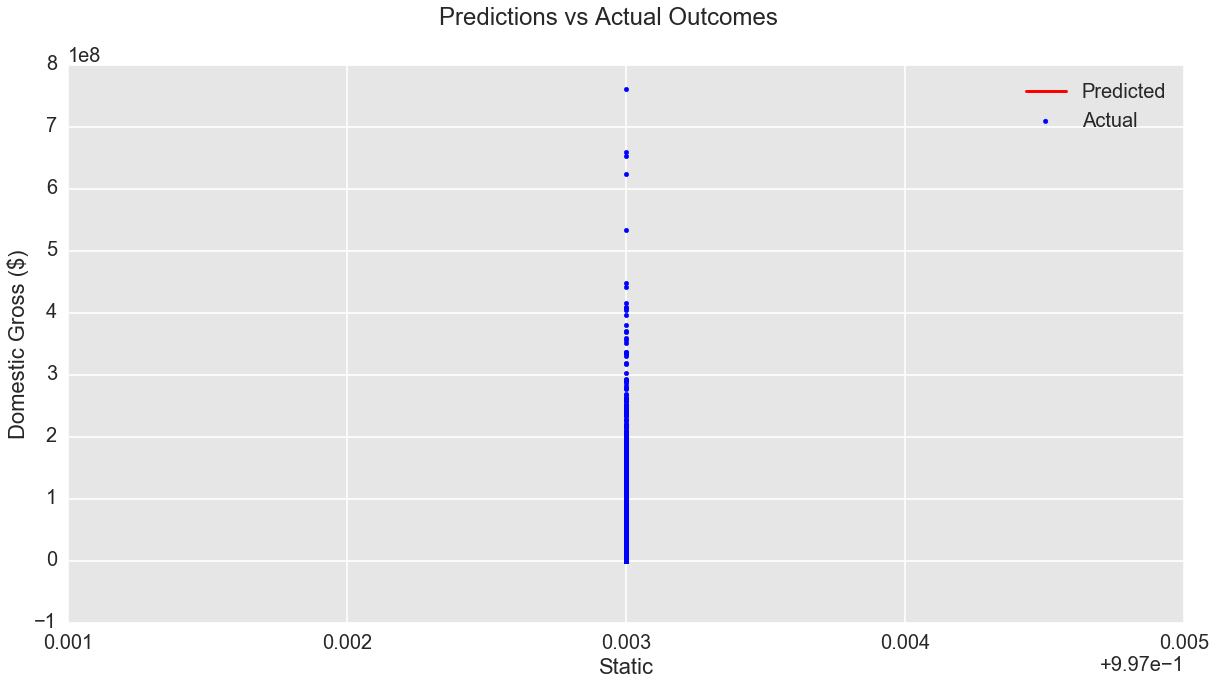

In [10]:
# plot
plt.figure(figsize=(20,10))
plt.suptitle('Predictions vs Actual Outcomes')
plt.ylabel('Domestic Gross ($)')
plt.xlabel('Static')
plt.scatter(X, y,  color='blue')
plt.plot(X, lrm.predict(X), color='red', linewidth=3)
#plt.xlim(0,2)
plt.legend(['Predicted', 'Actual'])
plt.show()

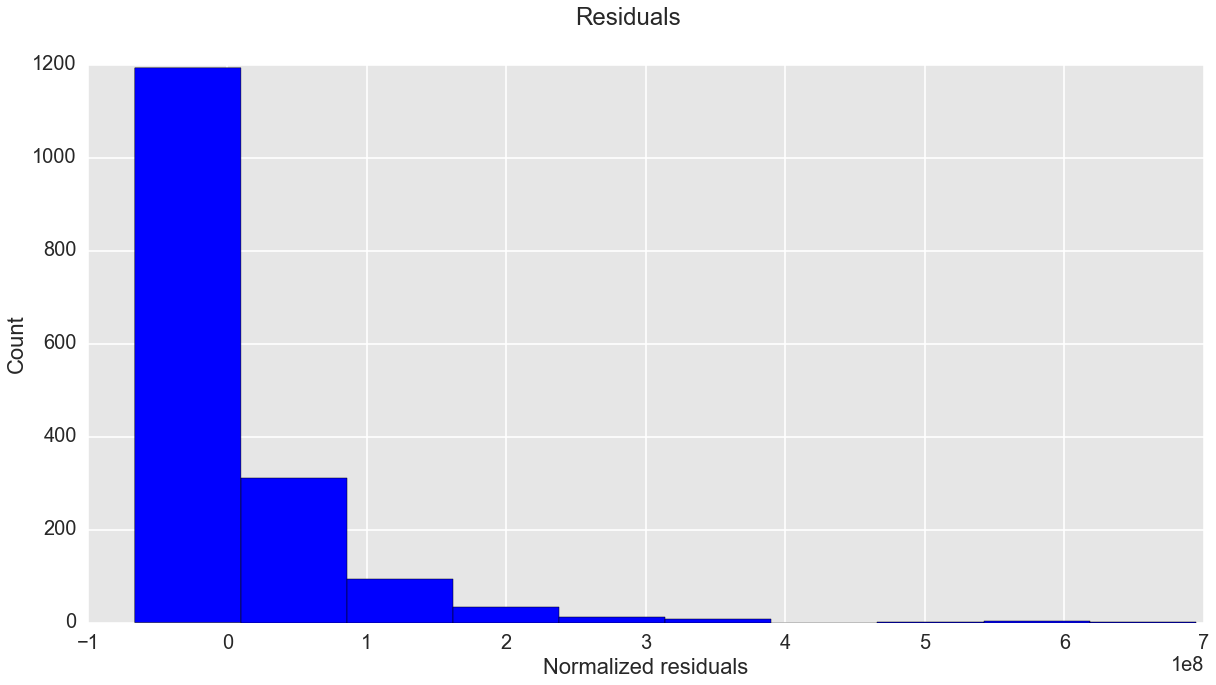

In [6]:
# residual histogram
plt.figure(figsize=(20,10))
plt.suptitle('Residuals')
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.hist(y - lrm.predict(X), color='b')
_ = plt.show()

## Answer for Challenge 1 is:
* What does it predict?

I am not quite sure what the model is predicting. 
* How are the residuals distributed?


___

# <a id='2'></a>Challenge 2:
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

## Answer for Challenge 2 is:

___

# <a id='3'></a>Challenge 3:
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

## Answer for Challenge 3 is:

___

# <a id='4'></a>Challenge 4:
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

## Answer for Challenge 4 is:

___

# <a id='5'></a>Challenge 5:
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

## Answer for Challenge 5 is:

___